<h2>Differential Equations</h2>
Note this source draws from the following resource <a href="http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html">http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html</a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



<h2>First-order equations </h2>

Let's try a first-order ordinary differential equation (ODE), say:
$$  $$
$$ \frac{dy}{dx}+y=x,\qquad y(0)=1.$$
 
This has a closed-form solution

$$y=x−1+2 e^{−x}$$
 
(Exercise: Show this, by first finding the integrating factor.)
We are going to solve this numerically.
First, let's import the "scipy" module and look at the help file for the relevant function, "integrate.odeint",

In [2]:
from scipy.integrate import odeint
#odeint?    # Uncomment to view the help file for this function

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

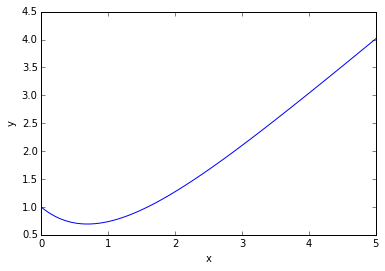

In [3]:
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("y");

Compare the numerical solution with the analytical solution by showing both on the same plot

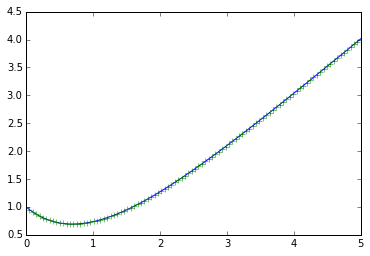

In [4]:
y_exact = xs - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(xs, ys, xs, y_exact, "+");

now take a look at the difference between the two series

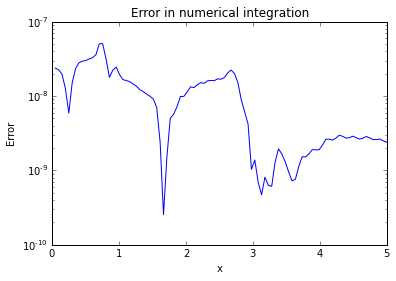

In [5]:
y_diff = np.abs(y_exact - ys)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");

<h2>Second-order ordinary differential equations </h2>
Suppose we have a second-order ODE such as a damped simple harmonic motion equation,
$$ $$
$$ y′′+2y′+2y=cos(2x),\qquad y(0)=0,\qquad y′(0)=0 $$

 
We can turn this into two first-order equations by defining a new depedent variable. For example,
$$ $$
$$ z≡y′⇒\qquad z′+2z+2y=cos(2x),\qquad z(0)=y(0)=0.$$
 
We can solve this system of ODEs using "odeint" with lists, as follows:

In [7]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

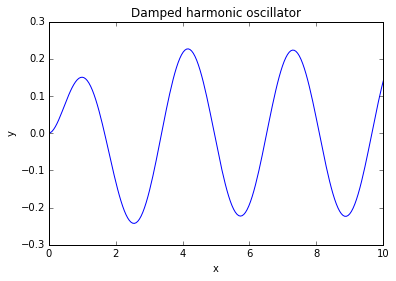

In [8]:
plt.plot(xs,ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator");


<h2>Predator-Prey Equations </h2>
Also known as Lotka-Volterra equations, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. For example, foxes (predators) and rabbits (prey). Let  $x$  and  $y$  represent rabbit and fox populations, respectively. Then
Here $a$ ,  $b$ ,  $c$  and  $d$  are parameters, which are assumed to be positive.

In [9]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

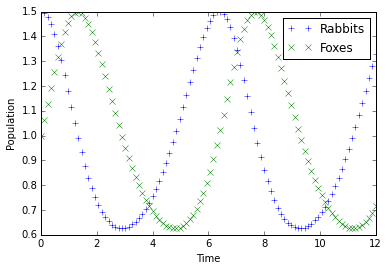

In [10]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

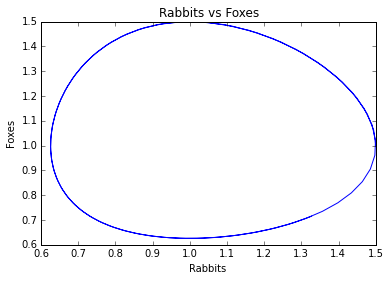

In [11]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

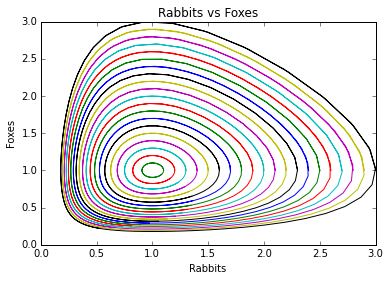

In [12]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");